In [87]:
from __future__ import absolute_import, division, print_function

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from random import shuffle

# TensorFlow and tf.keras
import tensorflow_probability as tfp
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix


print(tf.__version__)

2.0.0


In [2]:
#get values to be between 0 and 1

def feature_normalize(dataset):
    return(dataset-dataset.min())/(dataset.max()-dataset.min())

In [3]:
# https://stackoverflow.com/a/42523230
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        del df[each]
        df = pd.concat([df, dummies], axis=1)
    return df

In [664]:
df = pd.read_csv("Data_final.csv", skiprows = 0)
q = pd.read_csv('Masterfiltered.csv',skiprows = 0)

In [7]:
q.columns

Index(['Unnamed: 0', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'WnvPresent', 'NumMosquitos', 'year', 'month', 'day',
       'dist_2011-08-29 00:00:00', 'dist_2011-09-07 00:00:00',
       'dist_2013-07-17 00:00:00', 'dist_2013-07-25 00:00:00',
       'dist_2013-08-08 00:00:00', 'dist_2013-08-15 00:00:00',
       'dist_2013-08-16 00:00:00', 'dist_2013-08-22 00:00:00',
       'dist_2013-08-29 00:00:00', 'dist_2013-09-05 00:00:00',
       'days_2011-08-29 00:00:00', 'days_2011-09-07 00:00:00',
       'days_2013-07-17 00:00:00', 'days_2013-07-25 00:00:00',
       'days_2013-08-08 00:00:00', 'days_2013-08-15 00:00:00',
       'days_2013-08-16 00:00:00', 'days_2013-08-22 00:00:00',
       'days_2013-08-29 00:00:00', 'days_2013-09-05 00:00:00', 'trap_dist_st1',
       'trap_dist_st2', 'Station', 'WeatherLat_Station', 'WeatherLon_Station',
       'Tmax_Station', 'Tmin_Station', 'Tavg_Station', 'De

In [208]:
df

,Date,Station,Block,NumMosquitos,year,month,day,trap_dist_st1,trap_dist_st2,WnvPresent,...,MA_60_PrecipTotal_Station,MA_75_PrecipTotal_Station,MA_90_PrecipTotal_Station,MA_30_rel_hum_station,MA_45_rel_hum_station,MA_60_rel_hum_station,MA_75_rel_hum_station,MA_90_rel_hum_station,Latitude,Longitude
0,5/29/07,1,62,1,2007,5,29,8.403653,14.461215,0,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.867108,-87.654224
1,5/29/07,1,41,1,2007,5,29,7.327523,11.919859,0,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.867108,-87.654224
2,5/29/07,1,41,1,2007,5,29,7.327523,11.919859,0,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.862292,-87.648860
3,5/29/07,1,79,4,2007,5,29,5.738801,13.519119,0,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.896282,-87.655232
4,5/29/07,1,65,1,2007,5,29,7.058923,14.889271,0,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.907645,-87.760886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,9/26/13,2,71,1,2013,9,26,24.736567,9.835719,0,...,0.111583,0.1062,0.114444,62.285944,61.380137,60.988538,60.303977,61.218931,42.009876,-87.807277
8606,9/26/13,2,65,7,2013,9,26,25.109111,8.736411,0,...,0.111583,0.1062,0.114444,62.285944,61.380137,60.988538,60.303977,61.218931,41.992478,-87.862995
8607,9/26/13,2,10,4,2013,9,26,25.760791,9.516852,0,...,0.111583,0.1062,0.114444,62.285944,61.380137,60.988538,60.303977,61.218931,41.974689,-87.890615
8608,9/26/13,2,65,1,2013,9,26,25.109111,8.736411,0,...,0.111583,0.1062,0.114444,62.285944,61.380137,60.988538,60.303977,61.218931,41.974689,-87.890615


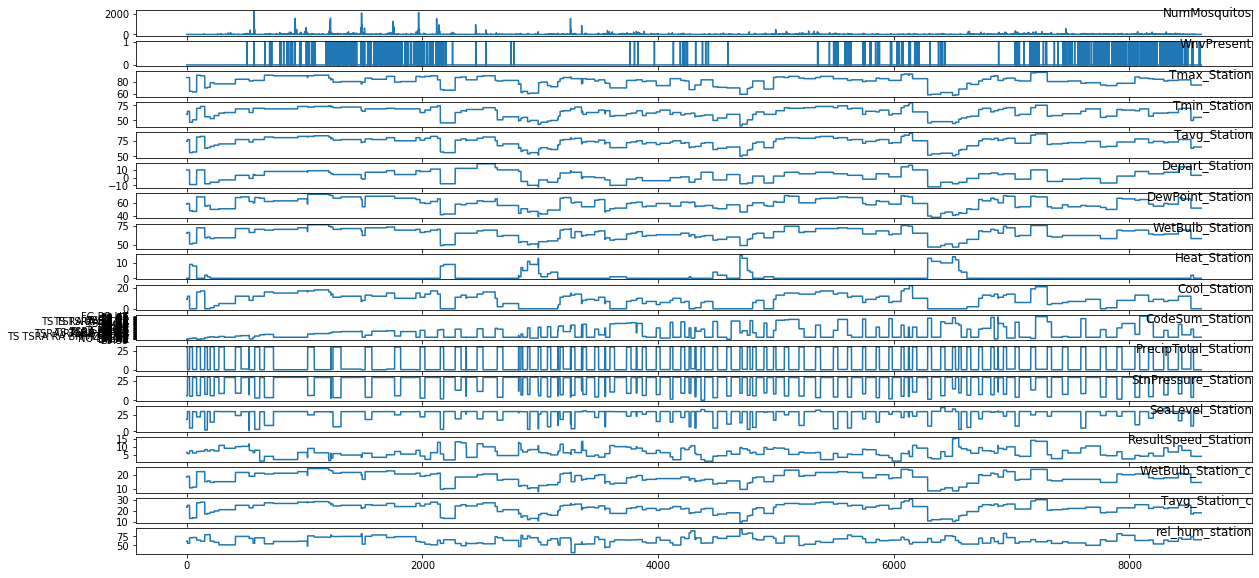

In [129]:
from matplotlib import pyplot
# load dataset

values = df.values
# specify columns to plot
groups = [3,9,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52]
i = 1
# plot each column
pyplot.figure(figsize=(20,10))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

# Imports

In [130]:
from fireTS.models import NARX, DirectAutoRegressor
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
import numpy as np

In [481]:
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
register_matplotlib_converters()

sns.set_context("notebook", font_scale=1.)
sns.set_style("whitegrid")
%config InlineBackend.figure_format = 'retina'

In [564]:
def plot_forecast(x, y,
                  forecast_mean, forecast_scale, forecast_samples,
                  title, x_locator=None, x_formatter=None):
    """Plot a forecast distribution against the 'true' time series."""
    colors = sns.color_palette()
    c1, c2 = colors[0], colors[1]
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 1, 1)

    num_steps = len(y)
    num_steps_forecast = forecast_mean.shape[-1]
    print(num_steps_forecast)
    num_steps_train = num_steps - num_steps_forecast
    print(num_steps_train)


    ax.plot(x, y, lw=2, color=c1, label='ground truth')

    forecast_steps = x[num_steps_train:]
    
    print(forecast_steps)

    ax.plot(forecast_steps, forecast_samples.T, lw=1, color=c2, alpha=0.1)

    ax.plot(forecast_steps, forecast_mean, lw=2, ls='--', color=c2,
           label='forecast')
    ax.fill_between(forecast_steps,
                   forecast_mean-2*forecast_scale,
                   forecast_mean+2*forecast_scale, color=c2, alpha=0.2)

    ymin, ymax = min(np.min(forecast_samples), np.min(y)), max(np.max(forecast_samples), np.max(y))
    yrange = ymax-ymin
    ax.set_ylim([ymin - yrange*0.1, ymax + yrange*0.1])
    ax.set_title("{}".format(title))
    ax.legend()

    if x_locator is not None:
        ax.xaxis.set_major_locator(x_locator)
        ax.xaxis.set_major_formatter(x_formatter)
    fig.autofmt_xdate()

    return fig, ax

In [480]:
def plot_components(dates,
                    component_means_dict,
                    component_stddevs_dict,
                    x_locator=None,
                    x_formatter=None):
    """Plot the contributions of posterior components in a single figure."""
    colors = sns.color_palette()
    c1, c2 = colors[0], colors[1]

    axes_dict = collections.OrderedDict()
    num_components = len(component_means_dict)
    fig = plt.figure(figsize=(12, 2.5 * num_components))
    for i, component_name in enumerate(component_means_dict.keys()):
        component_mean = component_means_dict[component_name]
        component_stddev = component_stddevs_dict[component_name]

        ax = fig.add_subplot(num_components,1,1+i)
        print(dates,component_mean)
        ax.plot(dates, component_mean, lw=2)
        ax.fill_between(dates,
                         component_mean-2*component_stddev,
                         component_mean+2*component_stddev,
                         color=c2, alpha=0.5)
        ax.set_title(component_name)
        if x_locator is not None:
            ax.xaxis.set_major_locator(x_locator)
            ax.xaxis.set_major_formatter(x_formatter)
        axes_dict[component_name] = ax
    fig.autofmt_xdate()
    fig.tight_layout()
    return fig, axes_dict

In [478]:
def plot_one_step_predictive(dates, observed_time_series,
                         one_step_mean, one_step_scale,
                         x_locator=None, x_formatter=None):
    """Plot a time series against a model's one-step predictions."""

    colors = sns.color_palette()
    c1, c2 = colors[0], colors[1]

    fig=plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1,1,1)
    num_timesteps = one_step_mean.shape[-1]
    ax.plot(dates, observed_time_series, label="observed time series", color=c1)
    ax.plot(dates, one_step_mean, label="one-step prediction", color=c2)
    ax.fill_between(dates,
                  one_step_mean - one_step_scale,
                  one_step_mean + one_step_scale,
                  alpha=0.1, color=c2)
    ax.legend()

    if x_locator is not None:
        ax.xaxis.set_major_locator(x_locator)
        ax.xaxis.set_major_formatter(x_formatter)
    fig.autofmt_xdate()
    fig.tight_layout()
    return fig, ax

# Structural Time Series Neural Network

In [136]:
df.columns

Index(['Date', 'Station', 'Block', 'NumMosquitos', 'year', 'month', 'day',
       'trap_dist_st1', 'trap_dist_st2', 'WnvPresent',
       'Species_CULEX_ERRATICUS', 'Species_CULEX_PIPIENS',
       'Species_CULEX_PIPIENS_RESTUANS', 'Species_CULEX_RESTUANS',
       'Species_CULEX_SALINARIUS', 'Species_CULEX_TARSALIS',
       'Species_CULEX_TERRITANS', 'dist_20110829', 'dist_20110907',
       'dist_20130717', 'dist_20130725', 'dist_20130808', 'dist_20130815',
       'dist_20130816', 'dist_20130822', 'dist_20130829', 'dist_20130905',
       'dist_20110829_days', 'dist_20110907_days', 'dist_20130717_days',
       'dist_20130725_days', 'dist_20130808_days', 'dist_20130815_days',
       'dist_20130816_days', 'dist_20130822_days', 'dist_20130829_days',
       'dist_20130905_days', 'Tmax_Station', 'Tmin_Station', 'Tavg_Station',
       'Depart_Station', 'DewPoint_Station', 'WetBulb_Station', 'Heat_Station',
       'Cool_Station', 'CodeSum_Station', 'PrecipTotal_Station',
       'StnPressure_Stat

In [40]:
test_df = df.loc[:,['Station','Date','month','year','Block','NumMosquitos','WnvPresent','Species_CULEX_PIPIENS','Species_CULEX_RESTUANS',
        'Species_CULEX_PIPIENS_RESTUANS','Tmax_Station','Tmin_Station','Tavg_Station',
        'Depart_Station','DewPoint_Station','WetBulb_Station',
        'PrecipTotal_Station','StnPressure_Station','SeaLevel_Station','ResultSpeed_Station',
        'rel_hum_station','MA_30_Tavg_Station','MA_30_PrecipTotal_Station',
       'MA_30_rel_hum_station','Latitude','Longitude']]

cols = list(test_df.columns.values)
cols.pop(cols.index('WnvPresent')) #pop wnv present
new_df = test_df[cols+['WnvPresent']] 

new_df.columns

#new_df.to_csv('Pruned_cols.csv')

Index(['Station', 'Date', 'month', 'year', 'Block', 'NumMosquitos',
       'Species_CULEX_PIPIENS', 'Species_CULEX_RESTUANS',
       'Species_CULEX_PIPIENS_RESTUANS', 'Tmax_Station', 'Tmin_Station',
       'Tavg_Station', 'Depart_Station', 'DewPoint_Station', 'WetBulb_Station',
       'PrecipTotal_Station', 'StnPressure_Station', 'SeaLevel_Station',
       'ResultSpeed_Station', 'rel_hum_station', 'MA_30_Tavg_Station',
       'MA_30_PrecipTotal_Station', 'MA_30_rel_hum_station', 'Latitude',
       'Longitude', 'WnvPresent'],
      dtype='object')

In [517]:
import datetime
new_df['Date']= pd.to_datetime(new_df['Date']) 
new_df['Date'] = new_df['Date'].astype('datetime64')

In [518]:
new_df

,Station,Date,month,year,Block,NumMosquitos,Species_CULEX_PIPIENS,Species_CULEX_RESTUANS,Species_CULEX_PIPIENS_RESTUANS,Tmax_Station,...,StnPressure_Station,SeaLevel_Station,ResultSpeed_Station,rel_hum_station,MA_30_Tavg_Station,MA_30_PrecipTotal_Station,MA_30_rel_hum_station,Latitude,Longitude,WnvPresent
0,1,2007-05-29,5,2007,62,1,0,1,0,88,...,5.8,18.00,6.5,61.600103,0.000000,0.000000,0.000000,41.867108,-87.654224,0
1,1,2007-05-29,5,2007,41,1,0,0,1,88,...,5.8,18.00,6.5,61.600103,0.000000,0.000000,0.000000,41.867108,-87.654224,0
2,1,2007-05-29,5,2007,41,1,0,1,0,88,...,5.8,18.00,6.5,61.600103,0.000000,0.000000,0.000000,41.862292,-87.648860,0
3,1,2007-05-29,5,2007,79,4,0,1,0,88,...,5.8,18.00,6.5,61.600103,0.000000,0.000000,0.000000,41.896282,-87.655232,0
4,1,2007-05-29,5,2007,65,1,0,0,1,88,...,5.8,18.00,6.5,61.600103,0.000000,0.000000,0.000000,41.907645,-87.760886,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2,2013-09-26,9,2013,71,1,0,0,1,75,...,29.4,30.04,4.1,65.513881,64.083333,0.087667,62.285944,42.009876,-87.807277,0
8606,2,2013-09-26,9,2013,65,7,0,0,1,75,...,29.4,30.04,4.1,65.513881,64.083333,0.087667,62.285944,41.992478,-87.862995,0
8607,2,2013-09-26,9,2013,10,4,0,0,1,75,...,29.4,30.04,4.1,65.513881,64.083333,0.087667,62.285944,41.974689,-87.890615,0
8608,2,2013-09-26,9,2013,65,1,1,0,0,75,...,29.4,30.04,4.1,65.513881,64.083333,0.087667,62.285944,41.974689,-87.890615,0


In [519]:
nn_df = new_df.loc[:,['Station','Date','month','year','Block','NumMosquitos','WnvPresent','Species_CULEX_PIPIENS','Species_CULEX_RESTUANS',
        'Species_CULEX_PIPIENS_RESTUANS','Tmax_Station','Tmin_Station','Tavg_Station',
        'Depart_Station','DewPoint_Station','WetBulb_Station',
        'PrecipTotal_Station','StnPressure_Station','SeaLevel_Station','ResultSpeed_Station',
        'rel_hum_station','MA_30_Tavg_Station','MA_30_PrecipTotal_Station',
       'MA_30_rel_hum_station']]

In [645]:
grouped_df = new_df.groupby(['Station']).sum()
grouped_df.iloc[:,5:]
dropped_new

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,rel_hum,MA_30_Tavg,MA_30_PrecipTotal,MA_30_rel_hum
0,1,2007-05-29,0.775,0.500000,0.648649,0.733333,0.571429,0.633333,0.992746,0.192893,0.485714,0.377622,0.497421,0.000000,0.000000,0.000000
7,2,2007-05-29,0.775,0.631579,0.729730,0.733333,0.600000,0.666667,0.000000,0.992893,0.831143,0.328671,0.403638,0.000000,0.000000,0.000000
25,1,2007-06-05,0.175,0.157895,0.162162,0.100000,0.285714,0.166667,0.982196,0.172589,0.114286,0.454545,0.646157,0.884049,0.999013,0.797661
50,2,2007-06-05,0.150,0.263158,0.189189,0.100000,0.257143,0.200000,0.008902,0.983418,0.822286,0.356643,0.654019,0.898996,0.003150,0.765020
85,1,2007-06-26,0.875,0.763158,0.837838,0.733333,0.885714,0.866667,0.992746,0.203046,0.600000,0.419580,0.546281,0.928678,0.997487,0.831512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8328,2,2013-09-12,0.650,0.578947,0.621622,0.633333,0.571429,0.600000,0.001978,0.989509,0.827714,0.398601,0.489556,0.902627,0.002951,0.822985
8416,1,2013-09-19,0.675,0.736842,0.729730,0.866667,0.857143,0.800000,0.984833,0.277496,0.428571,0.664336,0.640555,0.853726,0.998486,0.943657
8445,2,2013-09-19,0.675,0.763158,0.729730,0.866667,0.800000,0.766667,0.027695,0.985110,0.824857,0.468531,0.579453,0.874226,0.003101,0.842486
8522,1,2013-09-26,0.450,0.236842,0.351351,0.500000,0.400000,0.400000,0.990439,0.125212,0.200000,0.216783,0.695866,0.800342,0.998175,0.941542


In [670]:
#only using culex pipiens, culex restuans, and culex_pipiens_restuans measurements 
grouped_df = new_df.groupby(['Date','Station']).sum()
sums = grouped_df.loc[:,['NumMosquitos','WnvPresent']]
dropped = new_df.drop(['NumMosquitos','WnvPresent','Species_CULEX_RESTUANS','Species_CULEX_PIPIENS_RESTUANS','Species_CULEX_PIPIENS','Block','year','month','Latitude','Longitude'],axis = 1)
dropped_new = dropped.drop_duplicates()

for col in dropped_new.columns:
    if col.lower().endswith('_station'):
        dropped_new[col] = (dropped_new[col]- dropped_new[col].min())/(dropped_new[col].max()-dropped_new[col].min())
        name = col[:-8]
        dropped_new[name] = dropped_new[col]
        dropped_new.drop(col,axis = 1,inplace = True)
for col in sums:
    sums[col] = (sums[col]- sums[col].min())/(sums[col].max()-sums[col].min())

stations = pd.concat([s.reset_index(drop=True) for s in [dropped_new,sums]], axis=1).groupby('Station')

for j,k in stations:
 
    if j == 1: 
        station1 = k
    else:
        station2 = k

station1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,rel_hum,MA_30_Tavg,MA_30_PrecipTotal,MA_30_rel_hum,NumMosquitos,WnvPresent
0,1,2007-05-29,0.775,0.500000,0.648649,0.733333,0.571429,0.633333,0.992746,0.192893,0.485714,0.377622,0.497421,0.000000,0.000000,0.000000,0.001491,0.000000
2,1,2007-06-05,0.175,0.157895,0.162162,0.100000,0.285714,0.166667,0.982196,0.172589,0.114286,0.454545,0.646157,0.884049,0.999013,0.797661,0.009443,0.000000
4,1,2007-06-26,0.875,0.763158,0.837838,0.733333,0.885714,0.866667,0.992746,0.203046,0.600000,0.419580,0.546281,0.928678,0.997487,0.831512,0.012260,0.000000
6,1,2007-06-29,0.325,0.394737,0.351351,0.133333,0.485714,0.433333,0.993406,0.253807,0.028571,0.503497,0.774755,0.930387,0.997177,0.839604,0.006296,0.000000
8,1,2007-07-02,0.550,0.315789,0.432432,0.200000,0.342857,0.400000,0.996373,0.196277,0.371429,0.489510,0.496521,0.934230,0.997393,0.828743,0.012757,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,1,2013-08-29,0.800,0.657895,0.756757,0.666667,0.742857,0.766667,0.989449,0.128596,0.257143,0.251748,0.526584,0.906043,0.999018,0.906282,0.248840,0.578947
170,1,2013-09-06,0.725,0.421053,0.594595,0.566667,0.571429,0.600000,0.992746,0.155668,0.542857,0.342657,0.545283,0.895793,0.998830,0.912252,0.186547,0.736842
172,1,2013-09-12,0.625,0.552632,0.594595,0.633333,0.600000,0.600000,0.988460,0.233503,0.971429,0.580420,0.545283,0.881700,0.998979,0.923058,0.146620,0.421053
174,1,2013-09-19,0.675,0.736842,0.729730,0.866667,0.857143,0.800000,0.984833,0.277496,0.428571,0.664336,0.640555,0.853726,0.998486,0.943657,0.058482,0.210526


In [547]:
station2.reset_index()
station1.reset_index()

,index,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,rel_hum,MA_30_Tavg,MA_30_PrecipTotal,MA_30_rel_hum,NumMosquitos,WnvPresent
0,0,1,2007-05-29,0.775,0.500000,0.648649,0.733333,0.571429,0.633333,0.992746,0.192893,0.485714,0.377622,0.497421,0.000000,0.000000,0.000000,0.001491,0.000000
1,2,1,2007-06-05,0.175,0.157895,0.162162,0.100000,0.285714,0.166667,0.982196,0.172589,0.114286,0.454545,0.646157,0.884049,0.999013,0.797661,0.009443,0.000000
2,4,1,2007-06-26,0.875,0.763158,0.837838,0.733333,0.885714,0.866667,0.992746,0.203046,0.600000,0.419580,0.546281,0.928678,0.997487,0.831512,0.012260,0.000000
3,6,1,2007-06-29,0.325,0.394737,0.351351,0.133333,0.485714,0.433333,0.993406,0.253807,0.028571,0.503497,0.774755,0.930387,0.997177,0.839604,0.006296,0.000000
4,8,1,2007-07-02,0.550,0.315789,0.432432,0.200000,0.342857,0.400000,0.996373,0.196277,0.371429,0.489510,0.496521,0.934230,0.997393,0.828743,0.012757,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,168,1,2013-08-29,0.800,0.657895,0.756757,0.666667,0.742857,0.766667,0.989449,0.128596,0.257143,0.251748,0.526584,0.906043,0.999018,0.906282,0.248840,0.578947
80,170,1,2013-09-06,0.725,0.421053,0.594595,0.566667,0.571429,0.600000,0.992746,0.155668,0.542857,0.342657,0.545283,0.895793,0.998830,0.912252,0.186547,0.736842
81,172,1,2013-09-12,0.625,0.552632,0.594595,0.633333,0.600000,0.600000,0.988460,0.233503,0.971429,0.580420,0.545283,0.881700,0.998979,0.923058,0.146620,0.421053
82,174,1,2013-09-19,0.675,0.736842,0.729730,0.866667,0.857143,0.800000,0.984833,0.277496,0.428571,0.664336,0.640555,0.853726,0.998486,0.943657,0.058482,0.210526


In [548]:
# train_station1 = station1.iloc[0:67,]
# test_station1 = station1.iloc[67:84,]
# train_station2 = station2.iloc[0:75,]
# test_station2 = station2.iloc[75:94,]

train_station1 = station1
train_station2 = station2

# train_station1_array = np.array(train_station1.iloc[:,2:].values, dtype=np.float32)
# test_station1_array = np.array(test_station1.iloc[:,2:].values, dtype=np.float32)
# train_station2_array = np.array(train_station2.iloc[:,2:].values, dtype=np.float32)
# test_station2_array = np.array(test_station2.iloc[:,2:].values, dtype=np.float32)

n = train_station1.iloc[:,2:].astype('float32')
n = np.array(n.values, dtype=np.float32)

p = train_station2.iloc[:,2:].astype('float32')
p = np.array(p.values, dtype=np.float32)

train_station1 = train_station1.iloc[:,2:].astype('float32').T
test_station1 = test_station1.iloc[:,2:].astype('float32').T
train_station2 = train_station2.iloc[:,2:].astype('float32').T
test_station2 = test_station2.iloc[:,2:].astype('float32').T

train_station1_array = np.array(train_station1.values, dtype=np.float32)
test_station1_array = np.array(test_station1.values, dtype=np.float32)
train_station2_array = np.array(train_station2.values, dtype=np.float32)
test_station2_array = np.array(test_station2.values, dtype=np.float32)

train_station1_array


array([[0.775     , 0.175     , 0.875     , ..., 0.625     , 0.675     ,
        0.45      ],
       [0.5       , 0.15789473, 0.7631579 , ..., 0.55263156, 0.7368421 ,
        0.23684211],
       [0.6486486 , 0.16216215, 0.8378378 , ..., 0.5945946 , 0.7297297 ,
        0.35135135],
       ...,
       [0.        , 0.79766107, 0.831512  , ..., 0.9230581 , 0.94365716,
        0.9415421 ],
       [0.00149105, 0.00944334, 0.01225977, ..., 0.14662027, 0.05848244,
        0.02982107],
       [0.        , 0.        , 0.        , ..., 0.42105263, 0.21052632,
        0.10526316]], dtype=float32)

# Station1

In [627]:
tfd = tfp.distributions
tfb = tfp.bijectors

temperature_effect = tfp.sts.LinearRegression(
  design_matrix=tf.reshape(train_station1_array[2] - np.mean(train_station1_array[2]),
                           (-1, 1)), name='temperature_effect')
temperature_max_effect = tfp.sts.LinearRegression(
  design_matrix=tf.reshape(train_station1_array[0] - np.mean(train_station1_array[0]),
                           (-1, 1)), name='temperature_max_effect')
temperature_min_effect = tfp.sts.LinearRegression(
  design_matrix=tf.reshape(train_station1_array[1] - np.mean(train_station1_array[1]),
                           (-1, 1)), name='temperature_min_effect')

avg_temp_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station2_array[3]*5,
  name='avg_temp_effect')

Depart_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station1_array[3],
  name='Depart_effect')

Dew_point_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station1_array[4],
  name='Dew_point_effect')

Wet_bulb_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station1_array[5],
  name='Wet_bulb_effect')

Preciptotal_effect = tfp.sts.LinearRegression(
  design_matrix=tf.reshape(train_station1_array[6] - np.mean(train_station1_array[6]),
                           (-1, 1)), name='Preciptotal_effect')

Stn_pressure_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station1_array[7],
  name='Stn_pressure_effect')

Sea_Level_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station1_array[8],
  name='Sea_Level_effect')

rel_hum_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station1_array[10],
  name='rel_hum_effect')

num_mosquitos_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station1_array[14],
  name='num_mosquitos_effect')

WNVmodel = tfp.sts.Sum([temperature_effect,
                   temperature_max_effect,
                   temperature_min_effect,
                    avg_temp_effect,
                   Depart_effect,
                    Dew_point_effect,
                    Wet_bulb_effect,
                    Preciptotal_effect,
                    Sea_Level_effect,
                    rel_hum_effect,
                    num_mosquitos_effect      
                   ],
                   observed_time_series=train_station1_array[-1])

In [628]:
variational_posteriors = tfp.sts.build_factored_surrogate_posterior(
    model=WNVmodel)

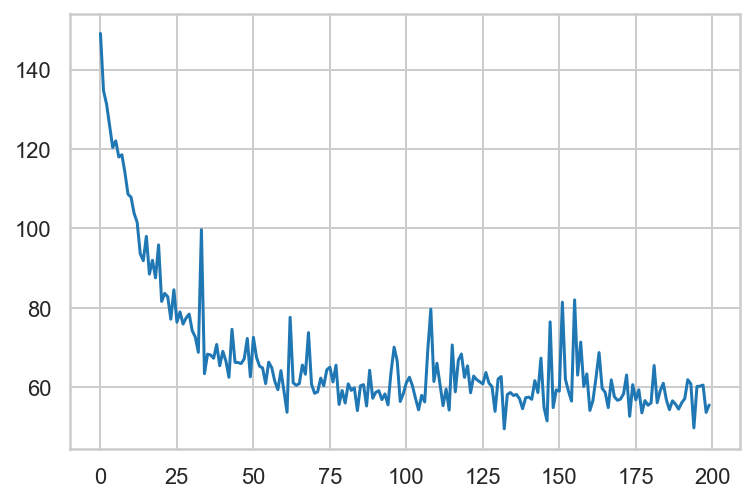

OrderedDict([('temperature_min_effect/_weights', <tf.Tensor: id=2627729, shape=(17, 1), dtype=float32, numpy=
array([[0.7630507 ],
       [0.5479571 ],
       [0.54355395],
       [0.6974055 ],
       [0.61007786],
       [0.6027173 ],
       [0.96447897],
       [0.5898192 ],
       [0.75637674],
       [0.606934  ],
       [0.7587391 ],
       [0.8099984 ],
       [0.979414  ],
       [0.49334908],
       [0.68038684],
       [0.80244064],
       [0.7955094 ]], dtype=float32)>), ('temperature_max_effect/_weights', <tf.Tensor: id=2627778, shape=(17, 1), dtype=float32, numpy=
array([[ 0.09593941],
       [ 0.08160461],
       [ 0.09979186],
       [ 0.12904115],
       [ 0.22228304],
       [ 0.17780995],
       [ 0.02093059],
       [ 0.2967086 ],
       [ 0.18851414],
       [ 0.08090734],
       [ 0.07180258],
       [ 0.06541099],
       [ 0.06237645],
       [ 0.05137417],
       [-0.05690268],
       [-0.09755901],
       [-0.02479449]], dtype=float32)>), ('temperature_effect/_we

In [629]:
#@title Minimize the variational loss.

# Allow external control of optimization to reduce test runtimes.
num_variational_steps = 200 # @param { isTemplate: true}
num_variational_steps = int(num_variational_steps)

optimizer = tf.optimizers.Adam(learning_rate=.1)
# Using fit_surrogate_posterior to build and optimize the variational loss function.
#tf.function(experimental_compile=True)

def train():
    elbo_loss_curve = tfp.vi.fit_surrogate_posterior(
    target_log_prob_fn=WNVmodel.joint_log_prob(
        observed_time_series=train_station1_array[-1]),
    surrogate_posterior=variational_posteriors,
    optimizer=optimizer,
    num_steps=num_variational_steps)
    return elbo_loss_curve

elbo_loss_curve = train()

plt.plot(elbo_loss_curve)
plt.show()

# Draw samples from the variational posterior.
q_samples_demand_ = variational_posteriors.sample(17)
print(q_samples_demand_)

In [630]:
print("Inferred parameters:")
for param in WNVmodel.parameters:
    print("{}: {} +- {}".format(param.name,
                              np.mean(q_samples_demand_[param.name], axis=0),
                              np.std(q_samples_demand_[param.name], axis=0)))

Inferred parameters:
observation_noise_scale: 0.009671381674706936 +- 0.008544856682419777
temperature_effect/_weights: [-0.297668] +- [0.11473513]
temperature_max_effect/_weights: [0.08619052] +- [0.09613184]
temperature_min_effect/_weights: [0.70601225] +- [0.13693407]
avg_temp_effect/_drift_scale: 0.006463347002863884 +- 0.005139876157045364
Depart_effect/_drift_scale: 0.07947887480258942 +- 0.08370354771614075
Dew_point_effect/_drift_scale: 0.08316729962825775 +- 0.0724836140871048
Wet_bulb_effect/_drift_scale: 0.008678548969328403 +- 0.011841749772429466
Preciptotal_effect/_weights: [10.514013] +- [4.2411613]
Sea_Level_effect/_drift_scale: 0.43226033449172974 +- 0.046366021037101746
rel_hum_effect/_drift_scale: 0.028159229084849358 +- 0.03830115497112274
num_mosquitos_effect/_drift_scale: 0.0021205577068030834 +- 0.005195014178752899


In [631]:
num_forecast_steps = 17
n_ready = n[-num_forecast_steps:]

demand_forecast_dist = tfp.sts.forecast(
    model=WNVmodel,
    observed_time_series=n_ready,
    parameter_samples=q_samples_demand_,
    num_steps_forecast=num_forecast_steps)

In [632]:
num_samples=17
(
    demand_forecast_mean,
    demand_forecast_scale,
    demand_forecast_samples
) = (
    demand_forecast_dist.mean().numpy()[..., 0],
    demand_forecast_dist.stddev().numpy()[..., 0],
    demand_forecast_dist.sample(num_samples).numpy()[..., 0]
    )

In [633]:
print(demand_forecast_mean)

[-0.1682681   0.42436284  0.00302041  0.33293667 -0.15123317  0.20138332
 -0.2333191   0.1325011  -0.18630931  0.11259713 -0.26667413  0.13832875
 -0.07277241  0.4016822  -0.03261853  0.14923902 -0.08606883]


In [634]:
demand_dates = np.array(station1['Date'].values)
demand = np.array(station1['WnvPresent'].values)

In [635]:
print(demand_dates,demand,demand_forecast_mean,demand_forecast_scale,demand_forecast_samples)

['2007-05-29T00:00:00.000000000' '2007-06-05T00:00:00.000000000'
 '2007-06-26T00:00:00.000000000' '2007-06-29T00:00:00.000000000'
 '2007-07-02T00:00:00.000000000' '2007-07-11T00:00:00.000000000'
 '2007-07-18T00:00:00.000000000' '2007-07-19T00:00:00.000000000'
 '2007-07-27T00:00:00.000000000' '2007-08-01T00:00:00.000000000'
 '2007-08-07T00:00:00.000000000' '2007-08-09T00:00:00.000000000'
 '2007-08-15T00:00:00.000000000' '2007-08-21T00:00:00.000000000'
 '2007-08-24T00:00:00.000000000' '2007-09-04T00:00:00.000000000'
 '2007-09-12T00:00:00.000000000' '2007-09-18T00:00:00.000000000'
 '2007-09-19T00:00:00.000000000' '2007-09-24T00:00:00.000000000'
 '2007-10-04T00:00:00.000000000' '2007-10-09T00:00:00.000000000'
 '2009-05-28T00:00:00.000000000' '2009-06-02T00:00:00.000000000'
 '2009-06-03T00:00:00.000000000' '2009-06-05T00:00:00.000000000'
 '2009-06-12T00:00:00.000000000' '2009-06-15T00:00:00.000000000'
 '2009-06-19T00:00:00.000000000' '2009-06-22T00:00:00.000000000'
 '2009-06-26T00:00:00.000

17
67
['2013-06-14T00:00:00.000000000' '2013-06-21T00:00:00.000000000'
 '2013-06-27T00:00:00.000000000' '2013-06-28T00:00:00.000000000'
 '2013-07-08T00:00:00.000000000' '2013-07-12T00:00:00.000000000'
 '2013-07-19T00:00:00.000000000' '2013-07-25T00:00:00.000000000'
 '2013-08-01T00:00:00.000000000' '2013-08-08T00:00:00.000000000'
 '2013-08-15T00:00:00.000000000' '2013-08-22T00:00:00.000000000'
 '2013-08-29T00:00:00.000000000' '2013-09-06T00:00:00.000000000'
 '2013-09-12T00:00:00.000000000' '2013-09-19T00:00:00.000000000'
 '2013-09-26T00:00:00.000000000']


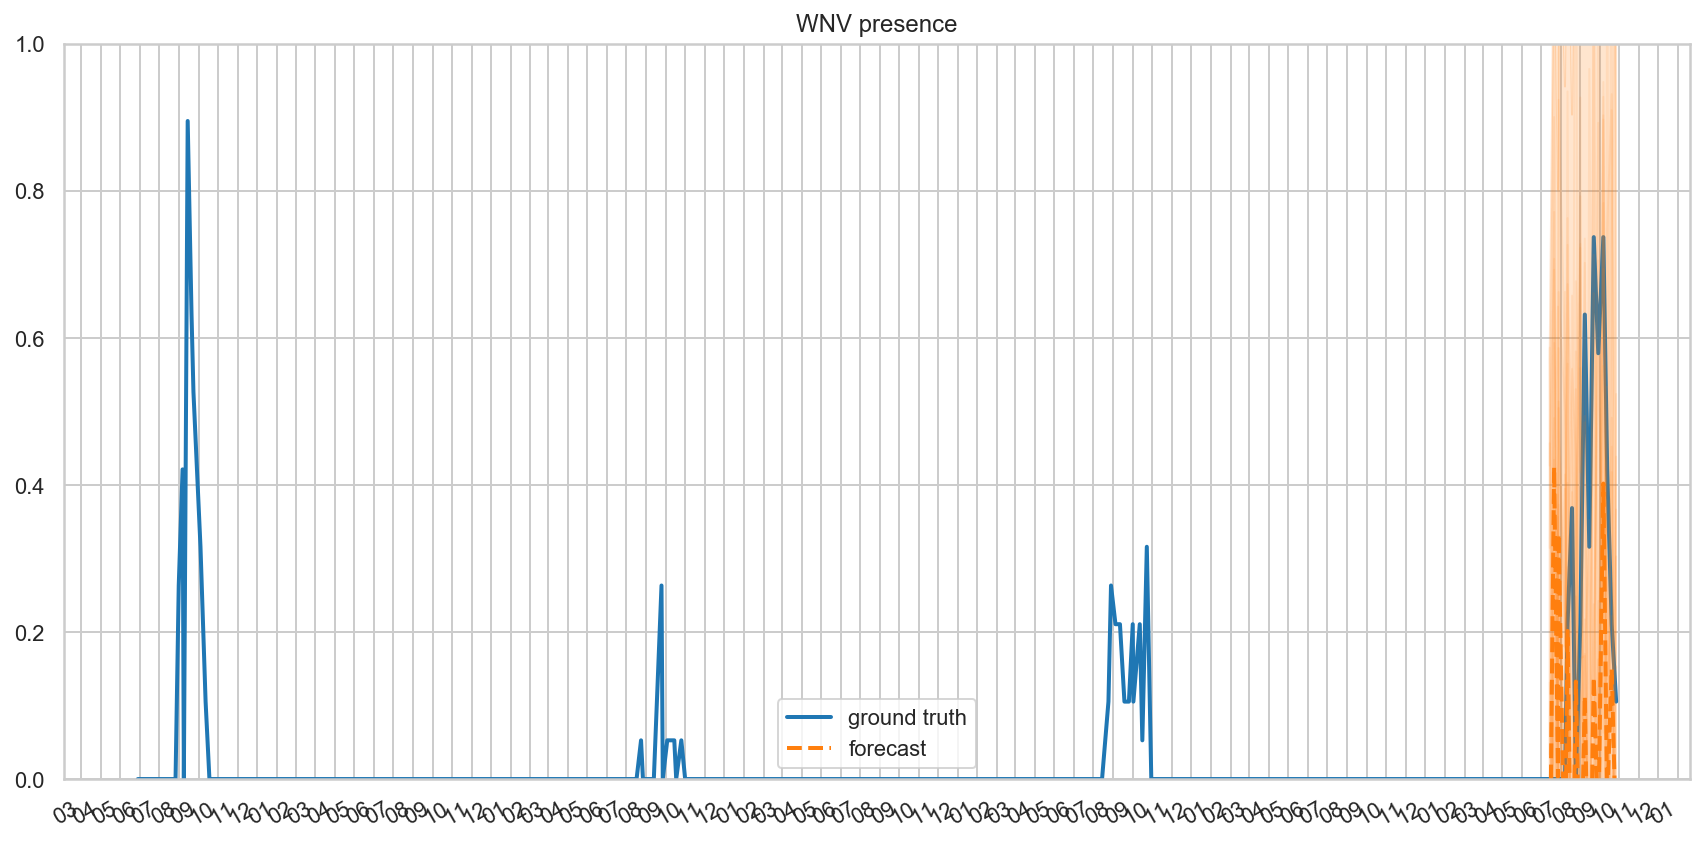

In [636]:
import matplotlib

fig, ax = plot_forecast(demand_dates, demand,
                        demand_forecast_mean,
                        demand_forecast_scale,
                        demand_forecast_samples,
                        title="WNV presence",x_locator = matplotlib.dates.MonthLocator(),x_formatter= matplotlib.dates.DateFormatter('%m')  
                        )
ax.set_ylim([0, 1.0])
fig.tight_layout()

# Station2

In [618]:
tfd = tfp.distributions
tfb = tfp.bijectors

temperature_effect = tfp.sts.LinearRegression(
  design_matrix=tf.reshape(train_station2_array[2] - np.mean(train_station2_array[2]),
                           (-1, 1)), name='temperature_effect')
temperature_max_effect = tfp.sts.LinearRegression(
  design_matrix=tf.reshape(train_station2_array[0] - np.mean(train_station2_array[0]),
                           (-1, 1)), name='temperature_max_effect')
temperature_min_effect = tfp.sts.LinearRegression(
  design_matrix=tf.reshape(train_station2_array[1] - np.mean(train_station2_array[1]),
                           (-1, 1)), name='temperature_min_effect')
avg_temp_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station2_array[3]*5,
  name='avg_temp_effect')

Depart_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station2_array[3],
  name='Depart_effect')

Dew_point_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station2_array[4],
  name='Dew_point_effect')

Wet_bulb_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station2_array[5],
  name='Wet_bulb_effect')

Preciptotal_effect = tfp.sts.LinearRegression(
  design_matrix=tf.reshape(train_station2_array[6] - np.mean(train_station2_array[6]),
                           (-1, 1)), name='Preciptotal_effect')

Stn_pressure_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station2_array[7],
  name='Stn_pressure_effect')

Sea_Level_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station2_array[8],
  name='Sea_Level_effect')

rel_hum_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station2_array[10],
  name='rel_hum_effect')

num_mosquitos_effect = tfp.sts.Seasonal(
  num_seasons=4,
  observed_time_series=train_station2_array[14],
  name='num_mosquitos_effect')

WNVmodel = tfp.sts.Sum([temperature_effect,
                   temperature_max_effect,
                   temperature_min_effect,
                    avg_temp_effect,
                   Depart_effect,
                    Dew_point_effect,
                    Wet_bulb_effect,
                    Preciptotal_effect,
                    Sea_Level_effect,
                    rel_hum_effect,
                    num_mosquitos_effect      
                   ],
                   observed_time_series=train_station2_array[-1])

In [619]:
variational_posteriors = tfp.sts.build_factored_surrogate_posterior(
    model=WNVmodel)

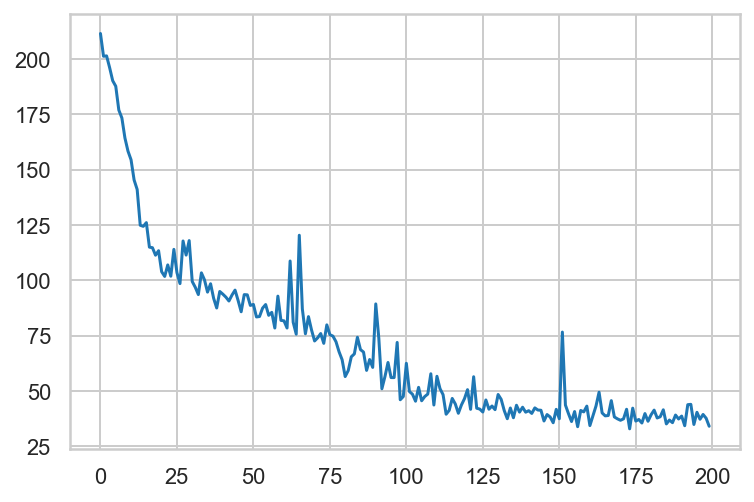

OrderedDict([('temperature_min_effect/_weights', <tf.Tensor: id=2515652, shape=(18, 1), dtype=float32, numpy=
array([[1.1482172 ],
       [0.5835909 ],
       [0.988048  ],
       [1.0191956 ],
       [1.0708872 ],
       [1.0893626 ],
       [0.95375913],
       [1.0573    ],
       [1.0050858 ],
       [1.1866277 ],
       [1.0983115 ],
       [0.8790747 ],
       [1.1685102 ],
       [0.9017595 ],
       [0.9969913 ],
       [0.82684886],
       [1.1348672 ],
       [1.0353826 ]], dtype=float32)>), ('temperature_max_effect/_weights', <tf.Tensor: id=2515701, shape=(18, 1), dtype=float32, numpy=
array([[0.7405694 ],
       [0.7148962 ],
       [0.6299329 ],
       [0.7005226 ],
       [0.82218266],
       [0.52628046],
       [0.5439421 ],
       [0.66259503],
       [0.96973217],
       [0.93128586],
       [0.5537758 ],
       [0.8548441 ],
       [0.48938408],
       [0.7815017 ],
       [0.5217544 ],
       [0.7423289 ],
       [0.76391774],
       [0.7411514 ]], dtype=float32)>),

In [620]:
#@title Minimize the variational loss.

# Allow external control of optimization to reduce test runtimes.
num_variational_steps = 200 # @param { isTemplate: true}
num_variational_steps = int(num_variational_steps)

optimizer = tf.optimizers.Adam(learning_rate=.1)
# Using fit_surrogate_posterior to build and optimize the variational loss function.
#tf.function(experimental_compile=True)

def train():
    elbo_loss_curve = tfp.vi.fit_surrogate_posterior(
    target_log_prob_fn=WNVmodel.joint_log_prob(
        observed_time_series=train_station2_array[-1]),
    surrogate_posterior=variational_posteriors,
    optimizer=optimizer,
    num_steps=num_variational_steps)
    return elbo_loss_curve

elbo_loss_curve = train()

plt.plot(elbo_loss_curve)
plt.show()

# Draw samples from the variational posterior.
q_samples_demand_ = variational_posteriors.sample(18)
print(q_samples_demand_)

In [621]:
print("Inferred parameters:")
for param in WNVmodel.parameters:
    print("{}: {} +- {}".format(param.name,
                              np.mean(q_samples_demand_[param.name], axis=0),
                              np.std(q_samples_demand_[param.name], axis=0)))

Inferred parameters:
observation_noise_scale: 0.23898877203464508 +- 0.017843443900346756
temperature_effect/_weights: [-1.4840991] +- [0.13810897]
temperature_max_effect/_weights: [0.70503324] +- [0.13726136]
temperature_min_effect/_weights: [1.0079901] +- [0.14137842]
avg_temp_effect/_drift_scale: 0.020652975887060165 +- 0.010815059766173363
Depart_effect/_drift_scale: 0.001159940380603075 +- 0.00092834368115291
Dew_point_effect/_drift_scale: 0.001665996853262186 +- 0.002860200824216008
Wet_bulb_effect/_drift_scale: 0.0028124512173235416 +- 0.0030560444574803114
Preciptotal_effect/_weights: [2.1972077] +- [2.8792672]
Sea_Level_effect/_drift_scale: 0.0007651039632037282 +- 0.002829749835655093
rel_hum_effect/_drift_scale: 0.0010438390308991075 +- 0.0015077651478350163
num_mosquitos_effect/_drift_scale: 0.007395820692181587 +- 0.014804667793214321


In [622]:
num_forecast_steps = 18
n_ready = n[-num_forecast_steps:]

demand_forecast_dist = tfp.sts.forecast(
    model=WNVmodel,
    observed_time_series=n_ready,
    parameter_samples=q_samples_demand_,
    num_steps_forecast=num_forecast_steps)

In [623]:
num_samples=18
(
    demand_forecast_mean,
    demand_forecast_scale,
    demand_forecast_samples
) = (
    demand_forecast_dist.mean().numpy()[..., 0],
    demand_forecast_dist.stddev().numpy()[..., 0],
    demand_forecast_dist.sample(num_samples).numpy()[..., 0]
    )

In [624]:
demand_dates = np.array(station2['Date'].values)
demand = np.array(station2['WnvPresent'].values)

18
76
['2013-06-07T00:00:00.000000000' '2013-06-14T00:00:00.000000000'
 '2013-06-21T00:00:00.000000000' '2013-06-27T00:00:00.000000000'
 '2013-06-28T00:00:00.000000000' '2013-07-08T00:00:00.000000000'
 '2013-07-12T00:00:00.000000000' '2013-07-19T00:00:00.000000000'
 '2013-07-25T00:00:00.000000000' '2013-08-01T00:00:00.000000000'
 '2013-08-08T00:00:00.000000000' '2013-08-15T00:00:00.000000000'
 '2013-08-22T00:00:00.000000000' '2013-08-29T00:00:00.000000000'
 '2013-09-06T00:00:00.000000000' '2013-09-12T00:00:00.000000000'
 '2013-09-19T00:00:00.000000000' '2013-09-26T00:00:00.000000000']


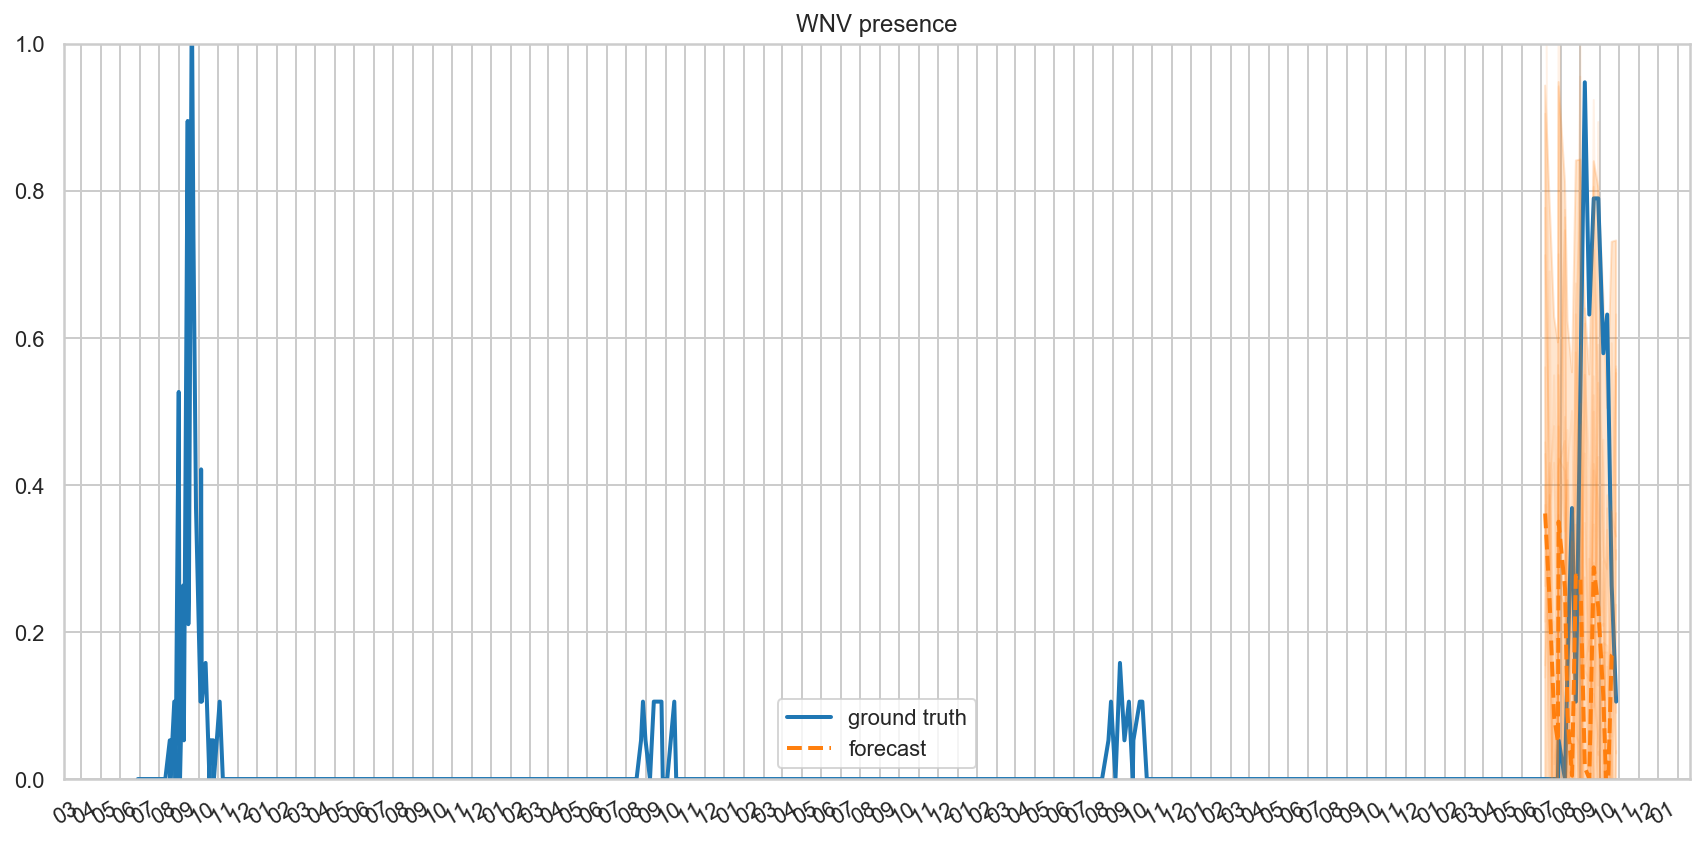

In [626]:
import matplotlib

fig, ax = plot_forecast(demand_dates, demand,
                        demand_forecast_mean,
                        demand_forecast_scale,
                        demand_forecast_samples,
                        title="WNV presence",x_locator = matplotlib.dates.MonthLocator(),x_formatter= matplotlib.dates.DateFormatter('%m')  
                        )
ax.set_ylim([0, 1])
fig.tight_layout()

In [585]:
# Get the distributions over component outputs from the posterior marginals on
# training data, and from the forecast model.
component_dists = tfp.sts.decompose_by_component(
    WNVmodel,
    observed_time_series=n_ready,
    parameter_samples=q_samples_demand_)

forecast_component_dists = tfp.sts.decompose_forecast_by_component(
    WNVmodel,
    forecast_dist=demand_forecast_dist,
    parameter_samples=q_samples_demand_)



In [ ]:
demand_component_means_, demand_component_stddevs_ = (
    {k.name: c.mean() for k, c in component_dists.items()},
    {k.name: c.stddev() for k, c in component_dists.items()})

(
    demand_forecast_component_means_,
    demand_forecast_component_stddevs_
) = (
    {k.name: c.mean() for k, c in forecast_component_dists.items()},
    {k.name: c.stddev() for k, c in forecast_component_dists.items()}
    )

10
['2007-05-29T00:00:00.000000000' '2007-06-05T00:00:00.000000000'
 '2007-06-26T00:00:00.000000000' '2007-06-29T00:00:00.000000000'
 '2007-07-02T00:00:00.000000000' '2007-07-11T00:00:00.000000000'
 '2007-07-18T00:00:00.000000000' '2007-07-19T00:00:00.000000000'
 '2007-07-27T00:00:00.000000000' '2007-08-01T00:00:00.000000000'
 '2007-08-07T00:00:00.000000000' '2007-08-09T00:00:00.000000000'
 '2007-08-15T00:00:00.000000000' '2007-08-21T00:00:00.000000000'
 '2007-08-24T00:00:00.000000000' '2007-09-04T00:00:00.000000000'
 '2007-09-12T00:00:00.000000000' '2007-09-18T00:00:00.000000000'
 '2007-09-19T00:00:00.000000000' '2007-09-24T00:00:00.000000000'
 '2007-10-04T00:00:00.000000000' '2007-10-09T00:00:00.000000000'
 '2009-05-28T00:00:00.000000000' '2009-06-02T00:00:00.000000000'
 '2009-06-03T00:00:00.000000000' '2009-06-05T00:00:00.000000000'
 '2009-06-12T00:00:00.000000000' '2009-06-15T00:00:00.000000000'
 '2009-06-19T00:00:00.000000000' '2009-06-22T00:00:00.000000000'
 '2009-06-26T00:00:00.

ValueError: x and y must have same first dimension, but have shapes (84,) and (33,)

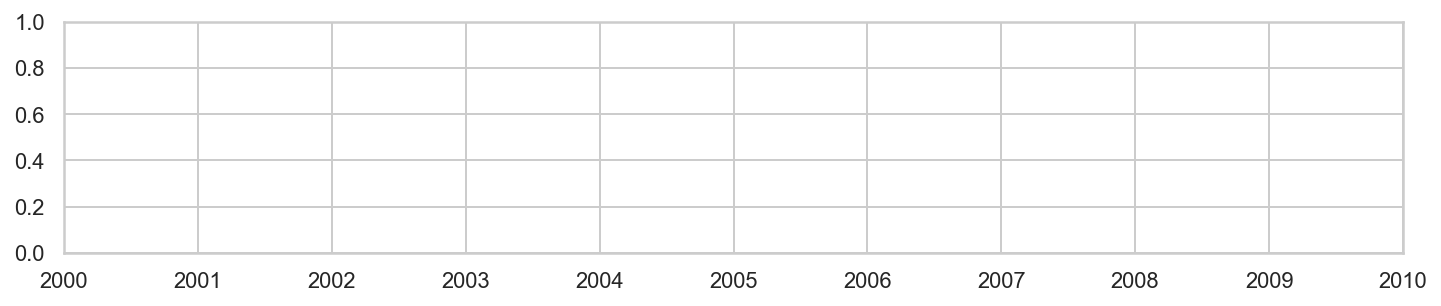

In [411]:
import collections
# Concatenate the training data with forecasts for plotting.
component_with_forecast_means_ = collections.OrderedDict()
component_with_forecast_stddevs_ = collections.OrderedDict()
for k in demand_component_means_.keys():
    component_with_forecast_means_[k] = np.concatenate([
      demand_component_means_[k],
      demand_forecast_component_means_[k]], axis=-1)
    component_with_forecast_stddevs_[k] = np.concatenate([
      demand_component_stddevs_[k],
      demand_forecast_component_stddevs_[k]], axis=-1)
print(len(component_with_forecast_means_))

fig, axes = plot_components(
  demand_dates,
  component_with_forecast_means_,
  component_with_forecast_stddevs_,
  x_locator = matplotlib.dates.MonthLocator(),x_formatter= matplotlib.dates.DateFormatter('%m'))

# for ax in axes.values():
#     ax.axvline(demand_dates[-num_forecast_steps], linestyle="--", color='red')

# end of west nile virus

In [259]:
shuffle(num_list)
print(num_list)
train = []
test = []

i = -1
for key,value in grouped_df:
    i+=1
    spot = num_list[i]
    if spot < 13:
        test.append((key,value))
    else:
        train.append((key,value))

print("len_train")
print(len(train))
print('Len_test')
print(len(test))

      

[21, 4, 41, 16, 46, 22, 14, 39, 55, 5, 60, 38, 17, 33, 62, 20, 31, 44, 26, 29, 48, 24, 7, 43, 51, 28, 13, 0, 30, 49, 57, 37, 52, 8, 40, 27, 10, 12, 32, 47, 63, 61, 1, 45, 58, 56, 15, 35, 6, 34, 59, 19, 11, 54, 25, 9, 3, 50, 36, 23, 53, 2, 18, 42]


ValueError: too many values to unpack (expected 2)

In [178]:
for tuple in train:
    train_df = feature_normalize(tuple[1]) 
    train_df.drop(columns =['Block'], inplace = True)
    print(tuple[0])
    
    x = train_df
    y = test_df
    #print(np.random.randn(100, 2))
    
    #print(x)
    #exog_order=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
    #exog_delay=[30,1,1,1,1,1,1,1,1,1,1,1,14,1,1,1,14,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
    #print(len(x))
    #print(len(y))
    # Build a non-linear autoregression model with exogenous inputs
    # using Random Forest regression as the base model
    mdl1 = NARX(
        RandomForestRegressor(n_estimators=10),
        auto_order=1,
        exog_order=[1,1],
        exog_delay=[0,0])
    mdl1.fit(train, test)
    ypred1 = mdl1.predict(train, test, step=3)
'''
    # SARIMAX example
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from random import random
    # contrived dataset
    data1 = new_df.iloc[:453]
    data2 = new_df.iloc[453:]
    # fit model
    model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    model_fit = model.fit(disp=False)
    # make prediction
    exog2 = [200 + random()]
    yhat = model_fit.predict(len(data1), len(data1), exog=[exog2])
    print(yhat)
    
    
    ytrain = new_df['WnvPresent'].iloc[:1000]
    Xtrain = new_df.loc[:, ['NumMosquitos','Tavg_Station']].iloc[:1000, :]

    ytest = new_df['WnvPresent'].iloc[1000:-1]
    Xtest = new_df.loc[:, ['NumMosquitos','Tavg_Station']].iloc[1000:-1, :]
    
    k = new_df.loc[:,['NumMosquitos','Tavg_Station']]
    
    train = k.sample(frac=0.8, random_state=138)
    test = k.drop(train.index)

    
    #creating the array of values
    dfnparray_train = train.values
    dfnparray_test = test.values

    #creating train label and train set
    train   = dfnparray_train[:, :-1]
    train_label = dfnparray_train[:, [-1]]

    #creating test label and test set
    test   = dfnparray_test[:, :-1]
    test_label = dfnparray_test[:, [-1]]
    
    print(len(train))
    exog_order=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
    exog_delay =[30,1,1,1,1,1,1,1,1,1,1,1,14,1,1,1,14,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
    print(len(exog_order))
    '''




0.0
      NumMosquitos  Species_CULEX_PIPIENS  Species_CULEX_RESTUANS  \
81        0.000000                    0.0                     1.0   
117       0.000000                    1.0                     0.0   
118       0.000642                    0.0                     1.0   
176       0.000000                    0.0                     0.0   
177       0.000000                    0.0                     1.0   
...            ...                    ...                     ...   
8584      0.000000                    0.0                     1.0   
8592      0.000000                    1.0                     0.0   
8599      0.001927                    0.0                     0.0   
8607      0.001927                    0.0                     0.0   
8609      0.003211                    1.0                     0.0   

      Species_CULEX_PIPIENS_RESTUANS  Tmax_Station  Tmin_Station  \
81                               0.0          0.15      0.263158   
117                            

ValueError: The indices for endog and exog are not aligned

In [7]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
# forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
# put it all together
agg = concat(cols, axis=1)
agg.columns = names
# drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = df
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

[[0.8541666666666666 0.33962264150943394 0.4474885844748858 ... 0 1
  'Presence']
 [0.7916666666666666 0.19811320754716982 1.0 ... 1 0 'Absence']
 [0.5833333333333334 0.2830188679245283 0.3082191780821918 ... 1 1
  'Presence']
 ...
 [0.5625 0.4339622641509434 0.3835616438356164 ... 0 0 'Absence']
 [0.5833333333333334 0.4339622641509434 0.1506849315068493 ... 0 0
  'Absence']
 [0.7916666666666666 0.6226415094339622 0.365296803652968 ... 0 1
  'Presence']]


In [8]:
train = df.sample(frac=0.7, random_state=138)
test = df.drop(train.index)

#creating the array of values
dfnparray_train = train.values
dfnparray_test = test.values

#creating train label and train set
train   = dfnparray_train[:, :-2]
train_label = dfnparray_train[:, [-2]]

#creating test label and test set
test   = dfnparray_test[:, :-2]
test_label = dfnparray_test[:, [-2]]


In [11]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard


In [12]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
#from packaging import version
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
!rm -rf ./logs/ 

In [13]:
seed = 8
np.random.seed(seed)
model = keras.Sequential([
#    keras.layers.Flatten(input_shape=(1, 6)),
#    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(30, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    #keras.layers.Dense(2, activation=tf.nn.softmax)
    #keras.layers.Dense(1, activation='tanh') #!!!!! 5 = number of categorical values in categorical classifier
    keras.layers.Dense(1, activation='sigmoid')
   
])


#Re(ctified) L(inear) (U)nit
#nn = neuralnet
#softmax

In [14]:
model.compile(
              optimizer= "rmsprop", 
#             optimizer='sgd', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

#sgd = gradient descent (steepness of move)

In [15]:
history = model.fit(train, train_label, epochs=100, batch_size = 15,callbacks=[tensorboard_callback])

Train on 189 samples
Epoch 1/100
189/189 [==============================] - 1s 7ms/sample - loss: 0.6505 - accuracy: 0.6138
Epoch 2/100
189/189 [==============================] - 0s 282us/sample - loss: 0.5429 - accuracy: 0.7884
Epoch 3/100
189/189 [==============================] - 0s 311us/sample - loss: 0.4624 - accuracy: 0.8148
Epoch 4/100
189/189 [==============================] - 0s 246us/sample - loss: 0.4192 - accuracy: 0.8148
Epoch 5/100
189/189 [==============================] - 0s 261us/sample - loss: 0.4009 - accuracy: 0.8148
Epoch 6/100
189/189 [==============================] - 0s 277us/sample - loss: 0.3837 - accuracy: 0.8307
Epoch 7/100
189/189 [==============================] - 0s 269us/sample - loss: 0.3704 - accuracy: 0.8413
Epoch 8/100
189/189 [==============================] - 0s 234us/sample - loss: 0.3589 - accuracy: 0.8571
Epoch 9/100
189/189 [==============================] - 0s 251us/sample - loss: 0.3482 - accuracy: 0.8571
Epoch 10/100
189/189 [==============

In [16]:
train_loss, train_acc = model.evaluate(test, test_label)

print('Train accuracy:', train_acc)
print('Train loss:', train_loss)


81/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [17]:
%tensorboard --logdir logs

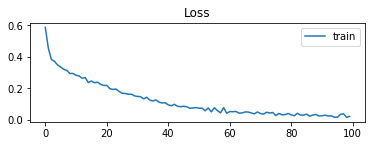

In [116]:
print(history)
#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
print(" ")
print(" ")


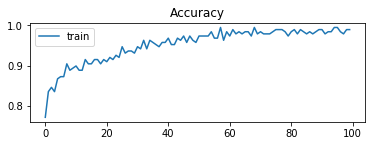

In [117]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
#plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [118]:
#from keras.utils import plot_model
#plot_model(model, expand_nested = True, show_shapes = True)

from IPython.display import SVG
from keras.utils import model_to_dot

import io
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib

img = io.BytesIO()
png_img = model_to_dot(model).create(prog='dot', format='png')
img.write(png_img)
img.seek(0)
img = mpimg.imread(img)
plt.imshow(img)




Using TensorFlow backend.


Using matplotlib backend: MacOSX


In [119]:
predictions = model.predict(test)
print(predictions)

[[2.68109143e-02]
 [7.91609287e-04]
 [1.00000000e+00]
 [1.05190277e-03]
 [1.18017197e-05]
 [4.34237719e-03]
 [3.27825546e-07]
 [0.00000000e+00]
 [9.98930156e-01]
 [1.00000000e+00]
 [1.22231245e-02]
 [4.70578671e-05]
 [9.99814928e-01]
 [9.83773589e-01]
 [8.94069672e-08]
 [5.06639481e-07]
 [1.00000000e+00]
 [9.99969959e-01]
 [4.24377710e-01]
 [1.60932541e-06]
 [1.19209290e-07]
 [5.22850335e-01]
 [2.68220901e-07]
 [1.10268593e-06]
 [3.69723618e-01]
 [0.00000000e+00]
 [9.38340664e-01]
 [2.97419667e-01]
 [2.93016434e-04]
 [9.99999881e-01]
 [1.13248825e-06]
 [1.00000000e+00]
 [9.05990601e-06]
 [9.99999523e-01]
 [1.79708004e-05]
 [8.64267349e-07]
 [9.99997497e-01]
 [5.96046448e-08]
 [2.47088075e-03]
 [3.25527787e-03]
 [0.00000000e+00]
 [9.99999523e-01]
 [0.00000000e+00]
 [3.02270055e-03]
 [9.99933898e-01]
 [4.04421300e-01]
 [5.69655478e-01]
 [9.97240424e-01]
 [8.80002975e-04]
 [0.00000000e+00]
 [1.00000000e+00]
 [9.93406534e-01]
 [4.17232513e-07]
 [9.89029169e-01]
 [2.09212303e-05]
 [6.565093